<a href="https://colab.research.google.com/github/siddheshabhang/Obesity-Risk-Classifier/blob/abhinav/XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
url = "https://raw.githubusercontent.com/siddheshabhang/Obesity-Risk-Classifier/master/Obesity_Risk%20Dataset/train.csv"
train = pd.read_csv(url)

og = pd.read_csv('/content/ObesityDataSet.csv.xls')
og = og.rename(columns={'NObeyesdad': 'WeightCategory'})

url2 = "https://raw.githubusercontent.com/siddheshabhang/Obesity-Risk-Classifier/d3da3b9935687478f9039ed9773199f505e55f3d/Obesity_Risk%20Dataset/test.csv"
test_df = pd.read_csv(url2)
test_ids = test_df['id']

train_df = pd.concat(
    [train, og],
    axis=0,
    ignore_index=True
)

# Save the combined dataset as CSV
train_df.to_csv("train_df.csv", index=False)


files.download("train_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(train_df.shape)
train_df.info()

(17644, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17644 entries, 0 to 17643
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  float64
 1   Gender                          17644 non-null  object 
 2   Age                             17644 non-null  float64
 3   Height                          17644 non-null  float64
 4   Weight                          17644 non-null  float64
 5   family_history_with_overweight  17644 non-null  object 
 6   FAVC                            17644 non-null  object 
 7   FCVC                            17644 non-null  float64
 8   NCP                             17644 non-null  float64
 9   CAEC                            17644 non-null  object 
 10  SMOKE                           17644 non-null  object 
 11  CH2O                            17644 non-null  float64
 12  SCC                 

In [ ]:
print(test_df.shape)
test_df.info()

(5225, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5225 non-null   int64  
 1   Gender                          5225 non-null   object 
 2   Age                             5225 non-null   float64
 3   Height                          5225 non-null   float64
 4   Weight                          5225 non-null   float64
 5   family_history_with_overweight  5225 non-null   object 
 6   FAVC                            5225 non-null   object 
 7   FCVC                            5225 non-null   float64
 8   NCP                             5225 non-null   float64
 9   CAEC                            5225 non-null   object 
 10  SMOKE                           5225 non-null   object 
 11  CH2O                            5225 non-null   float64
 12  SCC                    

In [ ]:
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']
target_column = 'WeightCategory'

In [ ]:
df_train_copy = train_df.copy()
df_test_copy = test_df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

for col in binary_cols:
    df_train_copy[col] = le.fit_transform(df_train_copy[col])
    df_test_copy[col] = le.transform(df_test_copy[col])

display(df_train_copy.head())
display(df_test_copy.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0.0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,15533,0,19.007177,1.772449,137.852618,1,1,3.000000,3.000000,Sometimes,0,2.007348,0,1.465931,0.813235,Sometimes,Public_Transportation
1,15534,0,21.572114,1.698346,75.000000,1,1,2.000000,3.000000,Sometimes,0,2.000000,0,1.577824,1.865851,Sometimes,Public_Transportation
2,15535,1,22.285024,1.737453,82.000000,1,1,2.000000,2.720642,Sometimes,0,1.830614,0,0.451009,0.000000,Sometimes,Public_Transportation
3,15536,1,30.916426,1.775580,120.860386,1,1,2.712747,3.000000,Sometimes,0,2.144368,0,0.712726,0.100048,Sometimes,Automobile
4,15537,0,18.000000,1.670000,65.000000,0,1,2.000000,3.000000,Sometimes,0,2.000000,0,1.000000,1.000000,no,Public_Transportation


In [ ]:
le = LabelEncoder()
cols_to_encode = ['CAEC', 'CALC', 'MTRANS']

for col in cols_to_encode:
    df_train_copy[col] = le.fit_transform(df_train_copy[col])
    df_test_copy[col] = le.fit_transform(df_test_copy[col])

display(df_train_copy.head())
display(df_test_copy.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0.0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,2,3,Overweight_Level_II
1,1.0,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,3,0,Normal_Weight
2,2.0,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,3,3,Insufficient_Weight
3,3.0,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,2,3,Obesity_Type_III
4,4.0,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,2,3,Overweight_Level_II


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,15533,0,19.007177,1.772449,137.852618,1,1,3.000000,3.000000,2,0,2.007348,0,1.465931,0.813235,1,3
1,15534,0,21.572114,1.698346,75.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.577824,1.865851,1,3
2,15535,1,22.285024,1.737453,82.000000,1,1,2.000000,2.720642,2,0,1.830614,0,0.451009,0.000000,1,3
3,15536,1,30.916426,1.775580,120.860386,1,1,2.712747,3.000000,2,0,2.144368,0,0.712726,0.100048,1,0
4,15537,0,18.000000,1.670000,65.000000,0,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,2,3


In [ ]:
X = df_train_copy.drop('WeightCategory', axis=1)
y = df_train_copy['WeightCategory']

In [ ]:
from sklearn.model_selection import train_test_split
target_le = LabelEncoder()
y_encoded = target_le.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

num_classes = len(np.unique(y_encoded))
print("Number of classes:",num_classes)

Number of classes: 7


# **XGB**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X, y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

<Figure size 800x600 with 0 Axes>

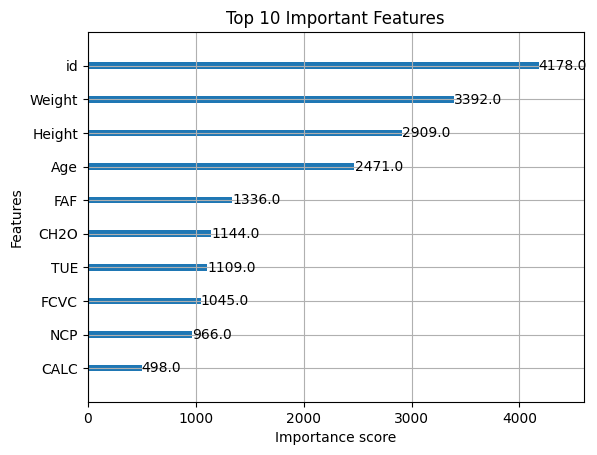

In [ ]:
plt.figure(figsize=(8,6))
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Important Features")
plt.show()

In [ ]:
#XGB+5Fold
from sklearn.model_selection import StratifiedKFold
xgb_model = xgb.XGBClassifier(
   objective='multi:softmax',
    n_estimators=100,
    learning_rate=0.3,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42,
    tree_method='hist'   # Evaluation metric for multi-class
)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_accuracies = []

print(f"Starting {n_splits}-Fold Cross-Validation...\n")

for fold, (train_index, val_index) in enumerate(skf.split(X, y_encoded)):
    print(f"--- Fold {fold+1}/{n_splits} ---")

    # Split data; note we use .iloc to select rows from DataFrame by integer location
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    fold_accuracies.append(accuracy)
    print(f"Validation Accuracy for Fold {fold+1}: {accuracy:.4f}\n")
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print("--- Cross-Validation Summary ---")
print(f"Fold Accuracies: {[f'{acc:.4f}' for acc in fold_accuracies]}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

Starting 5-Fold Cross-Validation...

--- Fold 1/5 ---
Validation Accuracy for Fold 1: 0.9045

--- Fold 2/5 ---
Validation Accuracy for Fold 2: 0.9173

--- Fold 3/5 ---
Validation Accuracy for Fold 3: 0.9042

--- Fold 4/5 ---
Validation Accuracy for Fold 4: 0.9116

--- Fold 5/5 ---
Validation Accuracy for Fold 5: 0.9096

--- Cross-Validation Summary ---
Fold Accuracies: ['0.9045', '0.9173', '0.9042', '0.9116', '0.9096']
Mean Accuracy: 0.9094
Standard Deviation of Accuracy: 0.0048


In [ ]:
#XGB+Optuna30+5fold
from sklearn.model_selection import StratifiedKFold
xgb_model = xgb.XGBClassifier(
   objective='multi:softmax',
    n_estimators=2783,
    learning_rate=0.0178163521,
    max_depth=6,
    min_child_weight=4,
    gamma=0.545355,
    subsample=0.657658,
    colsample_bytree=0.519786,
    reg_alpha=0.4848839,
    reg_lambda=0.712548,
    random_state=42,
    tree_method='hist',   # Evaluation metric for multi-class
    n_jobs=-1
)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_accuracies = []

print(f"Starting {n_splits}-Fold Cross-Validation...\n")

for fold, (train_index, val_index) in enumerate(skf.split(X, y_encoded)):
    print(f"--- Fold {fold+1}/{n_splits} ---")

    # Split data; note we use .iloc to select rows from DataFrame by integer location
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    fold_accuracies.append(accuracy)
    print(f"Validation Accuracy for Fold {fold+1}: {accuracy:.4f}\n")
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print("--- Cross-Validation Summary ---")
print(f"Fold Accuracies: {[f'{acc:.4f}' for acc in fold_accuracies]}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

In [ ]:
#XGB+Optuna120+5fold
from sklearn.model_selection import StratifiedKFold
xgb_model = xgb.XGBClassifier(
   objective='multi:softmax',
    n_estimators=2899,
    learning_rate=0.01502161874415902,
    max_depth=10,
    min_child_weight=1,
    gamma=0.6607161717722352,
    subsample=0.80473815571759,
    colsample_bytree=0.5005232429529874,
    reg_alpha=0.2572147667266388,
    reg_lambda=0.7878732309077885,
    random_state=42,
    tree_method='hist',   # Evaluation metric for multi-class
    n_jobs=-1
)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_accuracies = []

print(f"Starting {n_splits}-Fold Cross-Validation...\n")

for fold, (train_index, val_index) in enumerate(skf.split(X, y_encoded)):
    print(f"--- Fold {fold+1}/{n_splits} ---")

    # Split data; note we use .iloc to select rows from DataFrame by integer location
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    xgb_model.fit(X_train, y_train)

    y_pred = xgb_model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    fold_accuracies.append(accuracy)
    print(f"Validation Accuracy for Fold {fold+1}: {accuracy:.4f}\n")
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print("--- Cross-Validation Summary ---")
print(f"Fold Accuracies: {[f'{acc:.4f}' for acc in fold_accuracies]}")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.0 MB/s eta 0:00:00


In [ ]:
import optuna

# --- Define Optuna Objective Function ---
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 500, 1200),
        "learning_rate": trial.suggest_float("learning_rate", 0.02, 0.06, log=True),
        "max_depth": trial.suggest_int("max_depth", 5, 13),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 6),
        "gamma": trial.suggest_float("gamma", 0.3, 0.8),
        "subsample": trial.suggest_float("subsample", 0.55, 0.8),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 0.8),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.85, 1.0),
        "lambda": trial.suggest_float("lambda", 0.005, 0.2, log=True),
        "alpha": trial.suggest_float("alpha", 0.1, 1.0, log=True),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 2.0, 5.0),
        "random_state": 42,
        "tree_method": "hist",   # or "gpu_hist" if you have GPU
        "eval_metric": "logloss", # or "auc" for binary, "rmse" for regression
        "n_jobs": -1             # Use all available CPU cores
    }

    model = xgb.XGBClassifier(**params)

    # 5-fold Stratified Cross-validation for robustness
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    for train_idx, test_idx in skf.split(X, y_encoded):
        X_t, X_te = X.iloc[train_idx], X.iloc[test_idx]
        y_t, y_te = y_encoded[train_idx], y_encoded[test_idx]
        model.fit(X_t, y_t)
        preds = model.predict(X_te)
        scores.append(accuracy_score(y_te, preds))

    return np.mean(scores)

# --- Run Optuna Study ---
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=120, show_progress_bar=True)

# --- Train Best Model ---
best_params = study.best_params
print("\nBest Hyperparameters found by Optuna:")
for k, v in best_params.items():
    print(f"{k}: {v}")

# best_model = xgb.XGBClassifier(**best_params)
# best_model.fit(X, y_encoded)
# y_pred = best_model.predict(test_copy)

# acc = accuracy_score(y_val, y_pred)
# print(f"\n📈 Validation Accuracy after Optuna Tuning: {acc * 100:.2f}%")

[I 2025-10-25 13:54:10,352] A new study created in memory with name: no-name-eaee7ffc-3114-4c7e-8afb-6b8376053b94


  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:54:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:54:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:54:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:54:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:54:57] WARNING: /works

[I 2025-10-25 13:55:08,931] Trial 0 finished with value: 0.908967082860386 and parameters: {'n_estimators': 897, 'learning_rate': 0.01909591829190252, 'max_depth': 3, 'min_child_weight': 8, 'gamma': 0.14724111013539976, 'subsample': 0.5650718179699736, 'colsample_bytree': 0.5464951998783317, 'colsample_bylevel': 0.7499667973866004, 'lambda': 0.0015953297764848835, 'alpha': 0.3642404853194311, 'scale_pos_weight': 2.6505502041631974}. Best is trial 0 with value: 0.908967082860386.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:55:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:55:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:56:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:56:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:57:06] WARNING: /works

[I 2025-10-25 13:57:35,906] Trial 1 finished with value: 0.911293984108967 and parameters: {'n_estimators': 1805, 'learning_rate': 0.039414911143568744, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.22079179721655828, 'subsample': 0.5901652270301896, 'colsample_bytree': 0.7861333826606969, 'colsample_bylevel': 0.8368320345490778, 'lambda': 0.5184229498646336, 'alpha': 0.008161955885952612, 'scale_pos_weight': 4.098806452792015}. Best is trial 1 with value: 0.911293984108967.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:57:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:57:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:58:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:58:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:58:27] WARNING: /works

[I 2025-10-25 13:58:39,706] Trial 2 finished with value: 0.915493757094211 and parameters: {'n_estimators': 828, 'learning_rate': 0.03940168552765531, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.6561321299037574, 'subsample': 0.682130369976065, 'colsample_bytree': 0.8233294554021124, 'colsample_bylevel': 0.8753414999505064, 'lambda': 0.02333780828249089, 'alpha': 0.26301041292500604, 'scale_pos_weight': 4.7522551069310195}. Best is trial 2 with value: 0.915493757094211.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:58:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:59:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:59:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:59:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:00:16] WARNING: /works

[I 2025-10-25 14:00:39,469] Trial 3 finished with value: 0.9092508513053348 and parameters: {'n_estimators': 1783, 'learning_rate': 0.09220603143010665, 'max_depth': 5, 'min_child_weight': 8, 'gamma': 0.2586494929546872, 'subsample': 0.5595996005827713, 'colsample_bytree': 0.6170121208951747, 'colsample_bylevel': 0.9540532967324145, 'lambda': 0.32195361868558764, 'alpha': 0.2736331173789859, 'scale_pos_weight': 4.853234052761464}. Best is trial 2 with value: 0.915493757094211.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:00:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:00:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:00:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:01:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:01:16] WARNING: /works

[I 2025-10-25 14:01:26,638] Trial 4 finished with value: 0.8955732122587967 and parameters: {'n_estimators': 604, 'learning_rate': 0.00902462140198634, 'max_depth': 4, 'min_child_weight': 6, 'gamma': 0.4092790441686859, 'subsample': 0.5005540744799114, 'colsample_bytree': 0.8984628622499357, 'colsample_bylevel': 0.7663558119307201, 'lambda': 0.8012662862762493, 'alpha': 2.7726310362224447, 'scale_pos_weight': 2.019261654785542}. Best is trial 2 with value: 0.915493757094211.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:01:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:01:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:01:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:01:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:02:04] WARNING: /works

[I 2025-10-25 14:02:14,945] Trial 5 finished with value: 0.9122020431328035 and parameters: {'n_estimators': 783, 'learning_rate': 0.030717605754725742, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.3386141613213951, 'subsample': 0.9267824327368713, 'colsample_bytree': 0.6361557032071434, 'colsample_bylevel': 0.6093131699383748, 'lambda': 0.001261054703990625, 'alpha': 0.00957178207602538, 'scale_pos_weight': 4.870617680515765}. Best is trial 2 with value: 0.915493757094211.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:02:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:02:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:03:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:03:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:04:13] WARNING: /works

[I 2025-10-25 14:04:41,900] Trial 6 finished with value: 0.9149262202043132 and parameters: {'n_estimators': 2067, 'learning_rate': 0.01367897598308732, 'max_depth': 8, 'min_child_weight': 5, 'gamma': 0.710005346848536, 'subsample': 0.7689136094976308, 'colsample_bytree': 0.8710115239445337, 'colsample_bylevel': 0.6644329680783099, 'lambda': 0.0015490113023501845, 'alpha': 0.3398325760529729, 'scale_pos_weight': 1.9277757085902951}. Best is trial 2 with value: 0.915493757094211.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:04:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:04:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:05:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:05:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:05:43] WARNING: /works

[I 2025-10-25 14:05:58,321] Trial 7 finished with value: 0.9156072644721908 and parameters: {'n_estimators': 1076, 'learning_rate': 0.03071867227865085, 'max_depth': 11, 'min_child_weight': 8, 'gamma': 0.5153352995790467, 'subsample': 0.8567724621094379, 'colsample_bytree': 0.7958554260375065, 'colsample_bylevel': 0.755703402685547, 'lambda': 0.0018798293366879644, 'alpha': 0.35309845166906656, 'scale_pos_weight': 2.4045467259575823}. Best is trial 7 with value: 0.9156072644721908.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:05:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:06:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:06:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:06:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:07:13] WARNING: /works

[I 2025-10-25 14:07:30,244] Trial 8 finished with value: 0.9135073779795686 and parameters: {'n_estimators': 1572, 'learning_rate': 0.05610625140766042, 'max_depth': 3, 'min_child_weight': 4, 'gamma': 0.7830906376948804, 'subsample': 0.5030140994647049, 'colsample_bytree': 0.9203386926440638, 'colsample_bylevel': 0.7095611552453325, 'lambda': 1.0537080240746477, 'alpha': 0.10681560176387883, 'scale_pos_weight': 4.557045198658992}. Best is trial 7 with value: 0.9156072644721908.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:07:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:08:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:08:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:08:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:09:30] WARNING: /works

[I 2025-10-25 14:09:58,820] Trial 9 finished with value: 0.9158342792281499 and parameters: {'n_estimators': 2223, 'learning_rate': 0.03269424882637693, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.37312618282667986, 'subsample': 0.7677102685041082, 'colsample_bytree': 0.9197671095096566, 'colsample_bylevel': 0.7328307412116366, 'lambda': 9.59134954776567, 'alpha': 1.0097253214169588, 'scale_pos_weight': 4.170886647521082}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:09:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:10:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:11:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:11:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:12:36] WARNING: /works

[I 2025-10-25 14:13:16,294] Trial 10 finished with value: 0.908967082860386 and parameters: {'n_estimators': 2471, 'learning_rate': 0.005039970877993813, 'max_depth': 12, 'min_child_weight': 1, 'gamma': 0.9929702361163335, 'subsample': 0.7547039437930734, 'colsample_bytree': 0.9806985624792127, 'colsample_bylevel': 0.5010219844858487, 'lambda': 4.7019436182107555, 'alpha': 6.379377944912638, 'scale_pos_weight': 3.5086853473509576}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:13:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:13:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:13:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:13:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:14:07] WARNING: /works

[I 2025-10-25 14:14:19,003] Trial 11 finished with value: 0.9149262202043132 and parameters: {'n_estimators': 1205, 'learning_rate': 0.06670198912051145, 'max_depth': 11, 'min_child_weight': 10, 'gamma': 0.5424534969312633, 'subsample': 0.8847232076933946, 'colsample_bytree': 0.7053933536852273, 'colsample_bylevel': 0.8187724878334534, 'lambda': 0.024569698667790706, 'alpha': 1.2783042540221559, 'scale_pos_weight': 3.063941583482721}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:14:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:14:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:15:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:15:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:16:14] WARNING: /works

[I 2025-10-25 14:16:42,976] Trial 12 finished with value: 0.9144154370034052 and parameters: {'n_estimators': 1230, 'learning_rate': 0.022765285626796163, 'max_depth': 10, 'min_child_weight': 8, 'gamma': 0.02380394055233581, 'subsample': 0.828961022008979, 'colsample_bytree': 0.752522911574852, 'colsample_bylevel': 0.6102767839184652, 'lambda': 7.798240727145073, 'alpha': 0.0012875735116021805, 'scale_pos_weight': 0.560657397142311}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:16:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:16:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:17:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:17:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:17:19] WARNING: /works

[I 2025-10-25 14:17:31,774] Trial 13 finished with value: 0.9119750283768445 and parameters: {'n_estimators': 318, 'learning_rate': 0.022012587222323327, 'max_depth': 12, 'min_child_weight': 10, 'gamma': 0.4979029544655379, 'subsample': 0.9931939230197502, 'colsample_bytree': 0.9560166417975455, 'colsample_bylevel': 0.9255499527191438, 'lambda': 0.0182596925893421, 'alpha': 1.5268873721113994, 'scale_pos_weight': 1.4304424040418704}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:17:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:18:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:18:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:19:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:20:02] WARNING: /works

[I 2025-10-25 14:20:40,477] Trial 14 finished with value: 0.9150397275822929 and parameters: {'n_estimators': 2421, 'learning_rate': 0.012900275169925127, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 0.5401416317872639, 'subsample': 0.6851179991496024, 'colsample_bytree': 0.855305714982066, 'colsample_bylevel': 0.6815863736620026, 'lambda': 0.0728109255538691, 'alpha': 0.044770730940705175, 'scale_pos_weight': 3.819664004848675}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:20:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:20:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:21:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:21:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:21:42] WARNING: /works

[I 2025-10-25 14:21:57,003] Trial 15 finished with value: 0.9131101021566401 and parameters: {'n_estimators': 1406, 'learning_rate': 0.03462318209435191, 'max_depth': 10, 'min_child_weight': 7, 'gamma': 0.43303702414316825, 'subsample': 0.81686965779832, 'colsample_bytree': 0.7024181200615348, 'colsample_bylevel': 0.7617039941419301, 'lambda': 0.01080899393271889, 'alpha': 7.294107756038062, 'scale_pos_weight': 2.916866905965899}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:21:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:22:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:22:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:22:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:23:19] WARNING: /works

[I 2025-10-25 14:23:40,763] Trial 16 finished with value: 0.91577752553916 and parameters: {'n_estimators': 2192, 'learning_rate': 0.04969297067381753, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 0.9073694526122382, 'subsample': 0.6879155229985792, 'colsample_bytree': 0.8147620622532536, 'colsample_bylevel': 0.6147585277305339, 'lambda': 0.004752330723129831, 'alpha': 0.03454284809033293, 'scale_pos_weight': 2.4579161342155817}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:23:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:24:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:24:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:24:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:25:01] WARNING: /works

[I 2025-10-25 14:25:22,018] Trial 17 finished with value: 0.9152099886492622 and parameters: {'n_estimators': 2150, 'learning_rate': 0.057002875807219154, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 0.9719633278954638, 'subsample': 0.655809153878768, 'colsample_bytree': 0.9924356447803528, 'colsample_bylevel': 0.5144383152372102, 'lambda': 0.00563041113463886, 'alpha': 0.0373493647726845, 'scale_pos_weight': 3.3421580838244993}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:25:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:25:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:25:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:26:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:26:33] WARNING: /works

[I 2025-10-25 14:26:53,101] Trial 18 finished with value: 0.9138479001135075 and parameters: {'n_estimators': 2166, 'learning_rate': 0.09775467201488484, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.8549296136692005, 'subsample': 0.7119666201981287, 'colsample_bytree': 0.9262588471561133, 'colsample_bylevel': 0.5839990092090046, 'lambda': 0.1270802177240593, 'alpha': 0.01152757278667841, 'scale_pos_weight': 1.2253281048699756}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:26:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:27:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:27:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:27:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:28:12] WARNING: /works

[I 2025-10-25 14:28:30,957] Trial 19 finished with value: 0.9149829738933031 and parameters: {'n_estimators': 1886, 'learning_rate': 0.04941291241870789, 'max_depth': 6, 'min_child_weight': 2, 'gamma': 0.8917089654562803, 'subsample': 0.623619180738307, 'colsample_bytree': 0.835803509750445, 'colsample_bylevel': 0.5675952225579872, 'lambda': 2.510036353527417, 'alpha': 0.001873679314058166, 'scale_pos_weight': 4.163179644435783}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:28:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:28:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:29:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:29:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:29:54] WARNING: /works

[I 2025-10-25 14:30:14,313] Trial 20 finished with value: 0.9155505107832008 and parameters: {'n_estimators': 2312, 'learning_rate': 0.07275736025405044, 'max_depth': 9, 'min_child_weight': 4, 'gamma': 0.6348308782089744, 'subsample': 0.797055310512743, 'colsample_bytree': 0.7234293402615448, 'colsample_bylevel': 0.6397548064949244, 'lambda': 0.07000423713636701, 'alpha': 0.06239230901432079, 'scale_pos_weight': 2.1174590232667514}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:30:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:30:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:30:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:31:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:31:46] WARNING: /works

[I 2025-10-25 14:32:07,919] Trial 21 finished with value: 0.9148127128263337 and parameters: {'n_estimators': 1587, 'learning_rate': 0.028151726648012482, 'max_depth': 11, 'min_child_weight': 9, 'gamma': 0.2939746194647167, 'subsample': 0.8664826395075621, 'colsample_bytree': 0.785341924993829, 'colsample_bylevel': 0.7123530985303805, 'lambda': 0.003881288577785067, 'alpha': 0.8019962463550603, 'scale_pos_weight': 2.4403994586994107}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:32:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:32:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:32:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:33:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:33:36] WARNING: /works

[I 2025-10-25 14:33:58,288] Trial 22 finished with value: 0.9122587968217936 and parameters: {'n_estimators': 1139, 'learning_rate': 0.044801886948406304, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.13183915359882475, 'subsample': 0.7283590327206213, 'colsample_bytree': 0.8184621782228751, 'colsample_bylevel': 0.8061384354182274, 'lambda': 0.0058604405475274355, 'alpha': 0.13004545044652963, 'scale_pos_weight': 2.446944368064185}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:33:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:34:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:34:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:35:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:35:30] WARNING: /works

[I 2025-10-25 14:35:54,566] Trial 23 finished with value: 0.9144154370034052 and parameters: {'n_estimators': 1944, 'learning_rate': 0.027930840323215297, 'max_depth': 11, 'min_child_weight': 7, 'gamma': 0.3836627590623876, 'subsample': 0.9214508571837484, 'colsample_bytree': 0.8822811417957062, 'colsample_bylevel': 0.7183527742305557, 'lambda': 0.0026898976172466025, 'alpha': 0.01682323072803009, 'scale_pos_weight': 1.567449839795062}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:35:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:36:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:36:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:37:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:37:27] WARNING: /works

[I 2025-10-25 14:37:50,929] Trial 24 finished with value: 0.9152099886492622 and parameters: {'n_estimators': 1582, 'learning_rate': 0.018414676308786244, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.7750111651113827, 'subsample': 0.7838108191570479, 'colsample_bytree': 0.7717820409355698, 'colsample_bylevel': 0.8571186677355199, 'lambda': 0.18101444700807764, 'alpha': 0.003434776462676525, 'scale_pos_weight': 3.2519615617367195}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:37:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:38:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:38:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:38:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:39:06] WARNING: /works

[I 2025-10-25 14:39:25,234] Trial 25 finished with value: 0.9154370034052214 and parameters: {'n_estimators': 2291, 'learning_rate': 0.07382056649529269, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.5941468180415228, 'subsample': 0.8614530652484451, 'colsample_bytree': 0.6580217870836915, 'colsample_bylevel': 0.7829230138695905, 'lambda': 1.7870191833565148, 'alpha': 0.7084328521611919, 'scale_pos_weight': 2.6959688136441007}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:39:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:39:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:39:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:40:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:40:32] WARNING: /works

[I 2025-10-25 14:40:50,420] Trial 26 finished with value: 0.9132236095346198 and parameters: {'n_estimators': 1036, 'learning_rate': 0.035457230211075566, 'max_depth': 8, 'min_child_weight': 7, 'gamma': 0.4866582204547668, 'subsample': 0.7310925527623577, 'colsample_bytree': 0.9441044541824885, 'colsample_bylevel': 0.8875765580159021, 'lambda': 0.04415188077893588, 'alpha': 0.025834028841037852, 'scale_pos_weight': 3.5813132919319726}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:40:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:41:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:41:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:41:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:42:20] WARNING: /works

[I 2025-10-25 14:42:43,173] Trial 27 finished with value: 0.9145289443813848 and parameters: {'n_estimators': 1437, 'learning_rate': 0.014933601524462256, 'max_depth': 12, 'min_child_weight': 9, 'gamma': 0.7213592427719631, 'subsample': 0.9717376542915885, 'colsample_bytree': 0.7997716436604385, 'colsample_bylevel': 0.9986837909070362, 'lambda': 0.011936128411335558, 'alpha': 0.1704374597241886, 'scale_pos_weight': 0.9196570359148986}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:42:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:43:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:43:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:44:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:45:12] WARNING: /works

[I 2025-10-25 14:45:49,852] Trial 28 finished with value: 0.9156072644721908 and parameters: {'n_estimators': 2019, 'learning_rate': 0.025040104423014985, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.009983615852053429, 'subsample': 0.8364366478907904, 'colsample_bytree': 0.5025620200224602, 'colsample_bylevel': 0.5445004642243819, 'lambda': 0.001020239361571383, 'alpha': 3.1555314337425924, 'scale_pos_weight': 2.212606315842068}. Best is trial 9 with value: 0.9158342792281499.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:45:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:46:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:46:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:46:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:46:45] WARNING: /works

[I 2025-10-25 14:46:59,528] Trial 29 finished with value: 0.9171396140749148 and parameters: {'n_estimators': 546, 'learning_rate': 0.017106284423242968, 'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.18759222546340193, 'subsample': 0.9192201001503328, 'colsample_bytree': 0.5776813184165377, 'colsample_bylevel': 0.7392506662463799, 'lambda': 0.0026661968551880627, 'alpha': 0.5963031808680012, 'scale_pos_weight': 2.8415816447064843}. Best is trial 29 with value: 0.9171396140749148.

Best Hyperparameters found by Optuna:
n_estimators: 546
learning_rate: 0.017106284423242968
max_depth: 9
min_child_weight: 6
gamma: 0.18759222546340193
subsample: 0.9192201001503328
colsample_bytree: 0.5776813184165377
colsample_bylevel: 0.7392506662463799
lambda: 0.0026661968551880627
alpha: 0.5963031808680012
scale_pos_weight: 2.8415816447064843


In [ ]:
best_params = {
    "n_estimators": 651,
    "learning_rate": 0.03522300505815814,
    "max_depth": 11,
    "min_child_weight": 3,
    "gamma": 0.5291132228872165,
    "subsample": 0.5936265397616612,
    "colsample_bytree": 0.5587170669985586,
    "colsample_bylevel": 0.9569277792444651,
    "lambda": 0.015456553008016351,
    "alpha": 0.4561446157341352,
    "scale_pos_weight": 3.1781263235472674,
    "random_state": 42,
    "tree_method": "hist",
    "eval_metric": "logloss"
}
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X, y_encoded)
predictions_encoded = xgb_model.predict(df_test_copy)
predictions_original = target_le.inverse_transform(predictions_encoded)

# Create a new DataFrame for the submission
submission_df = pd.DataFrame({
    'id': test_ids,
    'WeightCategory': predictions_original
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:01:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "scale_pos_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Submission file 'submission.csv' created successfully!
